# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [1]:
# Import your libraries:

%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd

# Challenge 1 - Import and Describe the Dataset

In this lab, we will use a dataset containing information about customer preferences. We will look at how much each customer spends in a year on each subcategory in the grocery store and try to find similarities using clustering.

The origin of the dataset is [here](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

In [2]:
# loading the data:
df= pd.read_csv('..\data\Wholesale customers data.csv')
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


#### Explore the dataset with mathematical and visualization techniques. What do you find?

Checklist:

* What does each column mean?
* Any categorical data to convert?
* Any missing data to remove?
* Column collinearity - any high correlations?
* Descriptive statistics - any outliers to remove?
* Column-wise data distribution - is the distribution skewed?
* Etc.

Additional info: Over a century ago, an Italian economist named Vilfredo Pareto discovered that roughly 20% of the customers account for 80% of the typical retail sales. This is called the [Pareto principle](https://en.wikipedia.org/wiki/Pareto_principle). Check if this dataset displays this characteristic.

In [3]:
# What does each column mean

In [4]:
# CHANNEL: customers Channel - Horeca (Hotel/Restaurant/Café) or Retail channel (Nominal 1-->2)
df.Channel.unique()

array([2, 1], dtype=int64)

In [5]:
'''
CHANNEL Frequency
Horeca 298 --> 1
Retail 142 --> 2
'''
df.Channel.value_counts()

1    298
2    142
Name: Channel, dtype: int64

In [6]:
# REGION: customers Region Lisbon, Oporto or Other (Nominal 1-->3)
df.Region.unique()

array([3, 1, 2], dtype=int64)

In [7]:
'''
REGION Frequency
Lisbon 77 --> 1
Oporto 47 --> 2
Other Region 316 --> 3
'''
df.Region.value_counts()

3    316
1     77
2     47
Name: Region, dtype: int64

In [8]:
# All other columns indicate annual spending on products (Continuous);

In [9]:
# All the columns are numeric
# There are no missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
Channel             440 non-null int64
Region              440 non-null int64
Fresh               440 non-null int64
Milk                440 non-null int64
Grocery             440 non-null int64
Frozen              440 non-null int64
Detergents_Paper    440 non-null int64
Delicassen          440 non-null int64
dtypes: int64(8)
memory usage: 27.6 KB


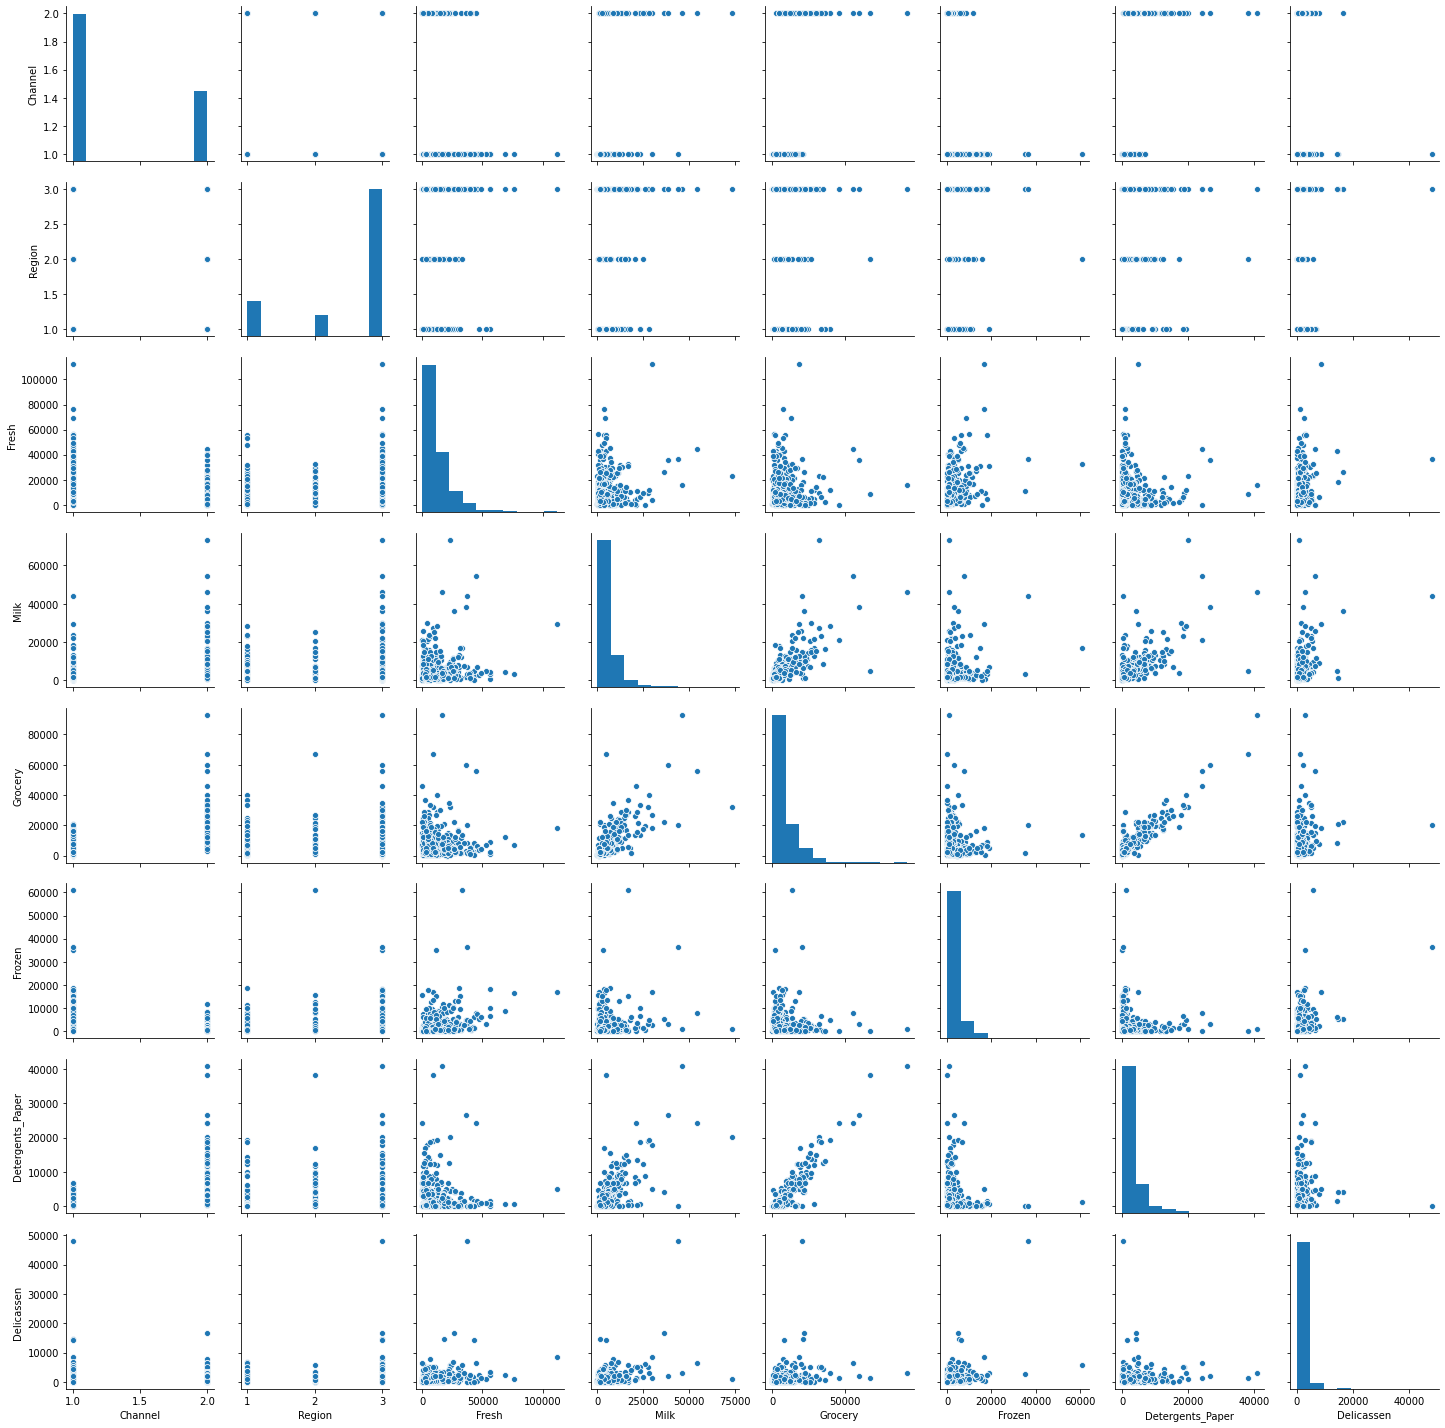

In [10]:
# Check column collinearity
sns.pairplot(df);

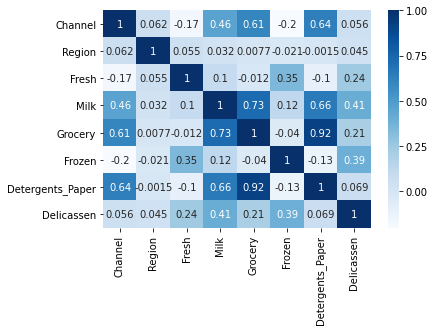

In [11]:
sns.heatmap(df.corr(), cmap='Blues', annot=True);
# The highest correlation is between Detergent papers- Grocery

In [12]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


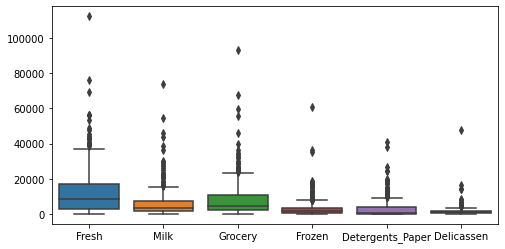

In [13]:
# outliers
var =[col for col in df.columns]
vars = var[2:]

plt.figure(figsize=(8,4))
sns.boxplot(data=df[vars]);

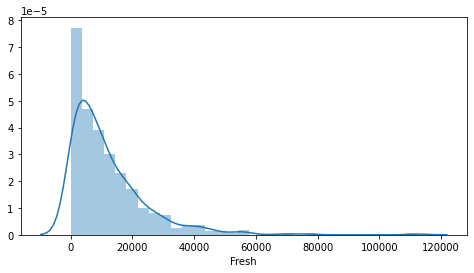

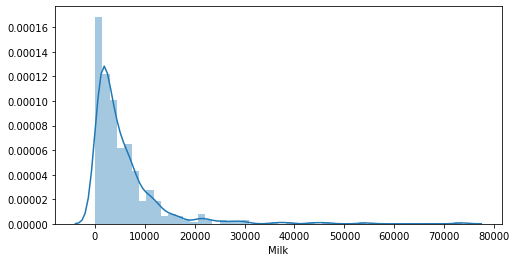

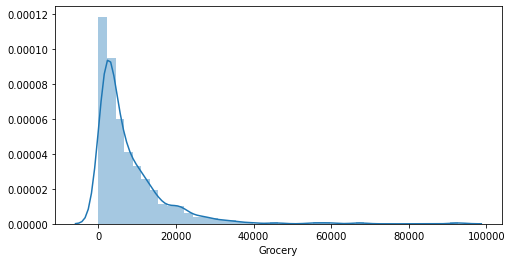

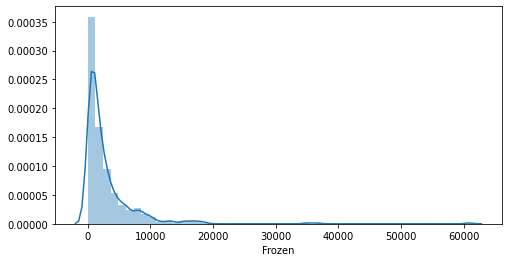

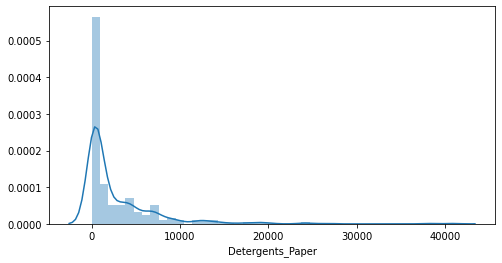

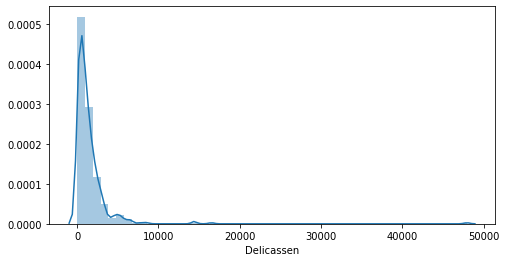

In [14]:
for i in vars:
    plt.figure(figsize=(8,4))
    sns.distplot(df[i])
# Numerical columns are right skewed

In [15]:
# The Pareto principle states that for many outcomes roughly 80% of consequences come from 20% of the causes (the “vital few”). 
# It is a skewed heavily tailed distribution.

In [16]:
# Pareto function
# x_m, alpha = 1, 3.
# #drawing samples from distribution
# samples = (np.random.pareto(alpha, 1000) + 1) * x_m
# count, bins, _ = plt.hist(samples, 100)
# fit = alpha*x_m**alpha / bins**(alpha+1)
# plt.plot(bins, max(count)*fit/max(fit), linewidth=2, color='r')
# plt.xlabel('bins', fontsize=15)
# plt.ylabel('probability density', fontsize=15)
# plt.title('Probability Density Function', fontsize=15)
# plt.grid(b=True, color='grey', alpha=0.3, linestyle='-.', linewidth=2)
# plt.rcParams['figure.figsize'] = [8, 8]
# plt.show()

In [17]:
df_aux =df.copy()

In [18]:
df_aux['Tot'] = df_aux['Fresh'] + df_aux['Milk'] + df_aux['Frozen'] + df_aux['Detergents_Paper'] + df_aux['Delicassen']
df_aux = df_aux.sort_values(by='Tot',ascending=False)
df_aux.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Tot
181,1,3,112151,29627,18148,16745,4948,8550,172021
183,1,3,36847,43950,20170,36534,239,47943,165513
47,2,3,44466,54259,55571,7782,24171,6465,137143
86,2,3,22925,73498,32114,987,20070,903,118383
325,1,2,32717,16784,13626,60869,1272,5609,117251


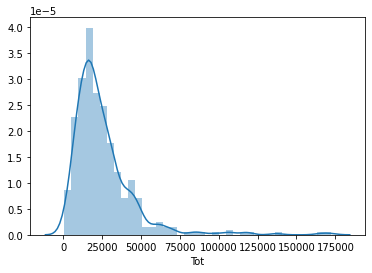

In [19]:
sns.distplot(df_aux['Tot'])

In [20]:
# Total annual spending on products
tot_money = df_aux.Tot.sum()

# 80% of annual spending
money_80perc = 0.8*tot_money
money_80perc

8896750.4

In [21]:
# Total customers
tot_customers = len(df_aux)

# 20% customers
customer_20perc = 0.2*len(df_aux)
customer_20perc

88.0

In [22]:
# Pareto's Law: 20% of customers spend 80% of total annual spending on products
def pareto_distribion(df):
    count = 0
    n_customers = []
    pareto_customers = []

    for i in list(df.Tot):
        count +=i
        n_customers.append(count)

        if count < money_80perc:
            pareto_customers.append(count)
            perc = (len(pareto_customers)/len(df))*100

    if perc <= 20*tot_customers:
        print(f"Pareto's law is NOT verified. {len(pareto_customers)} of customers ({round(perc,2)}%) spend 80% of total annual spending on products")
    else:
        print(f"Pareto's law is verified!{len(pareto_customers)} of customers ({round(perc,2)}%) spend 80% of total annual spending on products")
# print(pareto_customers[-1])
# print(len(pareto_customers))
# print(perc)

In [23]:
# Analysis with outliers
pareto_distribion(df_aux)

Pareto's law is NOT verified. 251 of customers (57.05%) spend 80% of total annual spending on products


In [24]:
# Your observations here

# 1. Need to convert 'Channel' and 'Region' to categorical
# 2. No null values to be removed
# 3. The highest correlation is between Detergent papers- Grocery
# 4. Numerical columns are right skewed
# 5. Pareto's Law is not verified

# Challenge 2 - Data Cleaning and Transformation

If your conclusion from the previous challenge is the data need cleaning/transformation, do it in the cells below. However, if your conclusion is the data need not be cleaned or transformed, feel free to skip this challenge. But if you do choose the latter, please provide rationale.

In [25]:
# Your code here
# Convert 'Channel' and 'Region' into categorical data
df.Channel = pd.Categorical(df.Channel)
df.Region = pd.Categorical(df.Region)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
Channel             440 non-null category
Region              440 non-null category
Fresh               440 non-null int64
Milk                440 non-null int64
Grocery             440 non-null int64
Frozen              440 non-null int64
Detergents_Paper    440 non-null int64
Delicassen          440 non-null int64
dtypes: category(2), int64(6)
memory usage: 21.8 KB


In [26]:
# Remove outliers
df1 = df[df[vars].apply(lambda x :(x-x.mean()).abs()<(3*x.std()) ).all(1)]
df1.describe()

# The range of values of raw data varies widely

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,10711.758454,4871.920290,6814.043478,2549.898551,2373.393720,1237.939614
std,9819.217756,4555.665546,6456.160715,2916.683284,3208.707909,1217.399162
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3063.250000,1477.750000,2116.000000,676.750000,252.750000,395.000000
50%,8040.000000,3530.000000,4528.000000,1447.000000,772.000000,881.000000
75%,15657.000000,6908.500000,9762.250000,3204.250000,3660.500000,1681.750000
max,49063.000000,25862.000000,34792.000000,16919.000000,17120.000000,7844.000000


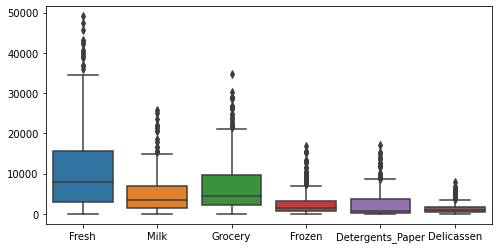

In [27]:
# outliers
var =[col for col in df1.columns]
vars = var[2:]
plt.figure(figsize=(8,4))
sns.boxplot(data=df1[vars]);

In [28]:
# Your comment here
# Collinearity --> Clustering doesn't rely on linear assumptions, and so collinearity wouldn't cause issues.
# For large data you could leverage the correlated variables via PCA/dimensionality reduction to reduce your computation overhead.

# Challenge 3 - Data Preprocessing

One problem with the dataset is the value ranges are remarkably different across various categories (e.g. `Fresh` and `Grocery` compared to `Detergents_Paper` and `Delicassen`). If you made this observation in the first challenge, you've done a great job! This means you not only completed the bonus questions in the previous Supervised Learning lab but also researched deep into [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). Keep on the good work!

Diverse value ranges in different features could cause issues in our clustering. The way to reduce the problem is through feature scaling. We'll use this technique again with this dataset.

#### We will use the `StandardScaler` from `sklearn.preprocessing` and scale our data. Read more about `StandardScaler` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*After scaling your data, assign the transformed data to a new variable `customers_scale`.*

In [29]:
# Your import here:

from sklearn.preprocessing import StandardScaler

# Your code here:
scaler = StandardScaler()
customers_scale = StandardScaler().fit_transform(df1[vars])
print(customers_scale)

[[ 0.19956882  1.05140907  0.11583669 -0.80184394  0.09379788  0.08229138]
 [-0.37265498  1.08525403  0.42707868 -0.27046195  0.28694383  0.44251008]
 [-0.44443787  0.86504201  0.13491131 -0.04973933  0.3565263   5.43293721]
 ...
 [ 0.38942639  2.33312218  3.63332091 -0.72529472  3.89025473  0.51735004]
 [-0.04300432 -0.63534473 -0.71057515 -0.51898944 -0.6881468   0.72953365]
 [-0.80804266 -0.69754034 -0.66746341 -0.85299117 -0.59172984 -0.97533705]]


# Challenge 3 - Data Clustering with K-Means

Now let's cluster the data with K-Means first. Initiate the K-Means model, then fit your scaled data. In the data returned from the `.fit` method, there is an attribute called `labels_` which is the cluster number assigned to each data record. What you can do is to assign these labels back to `customers` in a new column called `customers['labels']`. Then you'll see the cluster results of the original data.

In [30]:
# Your code here:
from sklearn.cluster import KMeans

# Model
kmeans= KMeans()

# Fit
clusters= kmeans.fit(customers_scale)

df1['labels'] = kmeans.labels_
df1.head()

D:\ANACONDA\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels
0,2,3,12669,9656,7561,214,2674,1338,1
1,2,3,7057,9810,9568,1762,3293,1776,1
2,2,3,6353,8808,7684,2405,3516,7844,2
3,1,3,13265,1196,4221,6404,507,1788,4
4,2,3,22615,5410,7198,3915,1777,5185,3


Count the values in `labels`.

In [31]:
# Your code here:
labels = df1['labels'].value_counts()
labels 

0    137
1     71
7     64
4     42
3     35
6     30
5     23
2     12
Name: labels, dtype: int64

# Challenge 4 - Data Clustering with DBSCAN

Now let's cluster the data using DBSCAN. Use `DBSCAN(eps=0.5)` to initiate the model, then fit your scaled data. In the data returned from the `.fit` method, assign the `labels_` back to `customers['labels_DBSCAN']`. Now your original data have two labels, one from K-Means and the other from DBSCAN.

In [32]:
# Your code here
from sklearn.cluster import DBSCAN

# Model
# DBSCAN - Density-Based Spatial Clustering of Applications with Noise.
# eps - The maximum distance between two samples for one to be considered as in the neighborhood of the other.
dbscan= DBSCAN(eps=0.5)

# Fit
clusters= dbscan.fit(customers_scale)

df1['labels_DBSCAN'] = dbscan.labels_
df1

D:\ANACONDA\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels,labels_DBSCAN
0,2,3,12669,9656,7561,214,2674,1338,1,-1
1,2,3,7057,9810,9568,1762,3293,1776,1,-1
2,2,3,6353,8808,7684,2405,3516,7844,2,-1
3,1,3,13265,1196,4221,6404,507,1788,4,-1
4,2,3,22615,5410,7198,3915,1777,5185,3,-1
...,...,...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204,4,-1
436,1,3,39228,1431,764,4510,93,2346,5,-1
437,2,3,14531,15488,30243,437,14841,1867,6,-1
438,1,3,10290,1981,2232,1038,168,2125,0,-1


Count the values in `labels_DBSCAN`.

In [33]:
# Your code here
labels1 = df1['labels_DBSCAN'].value_counts()
labels1 

-1    294
 0    105
 1     15
Name: labels_DBSCAN, dtype: int64

# Challenge 5 - Compare K-Means with DBSCAN

Now we want to visually compare how K-Means and DBSCAN have clustered our data. We will create scatter plots for several columns. For each of the following column pairs, plot a scatter plot using `labels` and another using `labels_DBSCAN`. Put them side by side to compare. Which clustering algorithm makes better sense?

Columns to visualize:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

Visualize `Detergents_Paper` as X and `Milk` as y by `labels` and `labels_DBSCAN` respectively

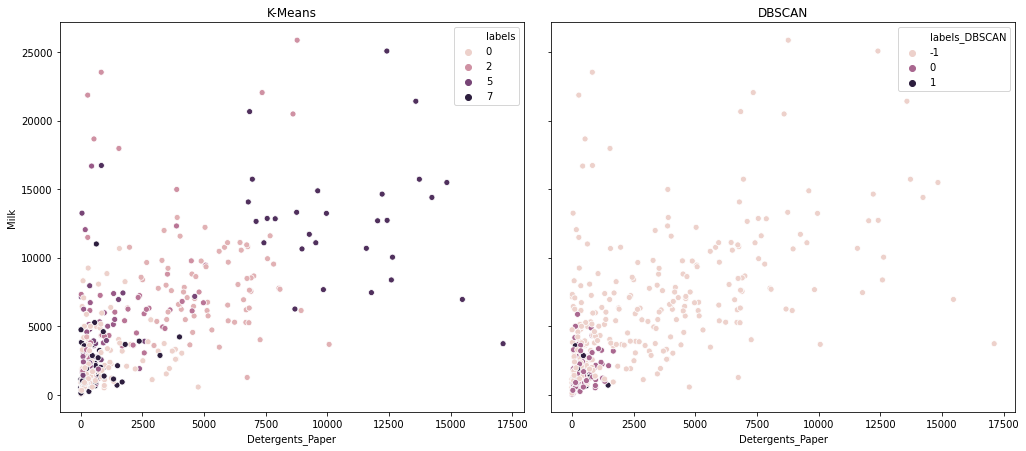

In [34]:
# Your code here:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(14, 6))
fig.tight_layout()

plt.sca(ax1)
ax1 = sns.scatterplot(x=df1.Detergents_Paper, y=df1.Milk, hue=df1.labels)
ax1.set_title('K-Means')
ax1.legend()

plt.sca(ax2)
ax2 = sns.scatterplot(x=df1.Detergents_Paper, y=df1.Milk, hue=df1.labels_DBSCAN)
ax2.set_title('DBSCAN')
ax2.legend();

Visualize `Grocery` as X and `Fresh` as y by `labels` and `labels_DBSCAN` respectively

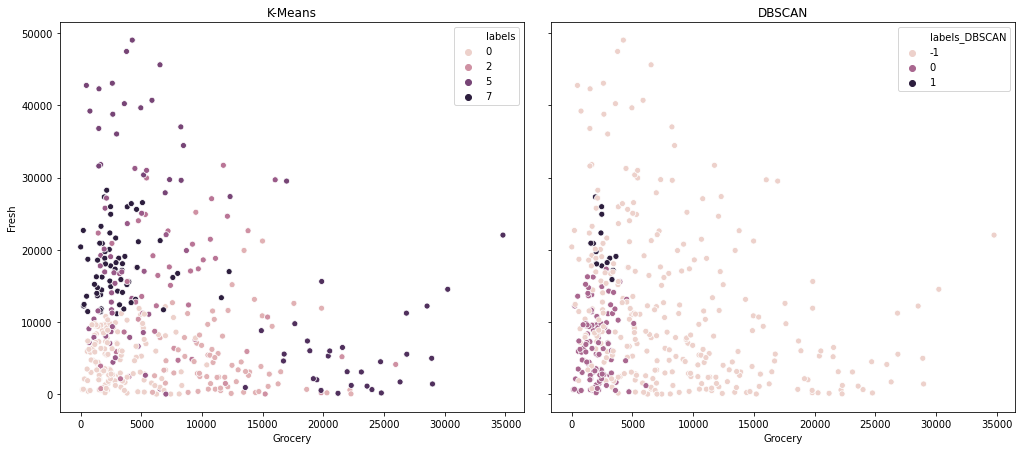

In [35]:
# Your code here:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(14, 6))
fig.tight_layout()

plt.sca(ax1)
ax1 = sns.scatterplot(x=df1.Grocery, y=df1.Fresh, hue=df1.labels)
ax1.set_title('K-Means')
ax1.legend()

plt.sca(ax2)
ax2 = sns.scatterplot(x=df1.Grocery, y=df1.Fresh, hue=df1.labels_DBSCAN)
ax2.set_title('DBSCAN')
ax2.legend();

Visualize `Frozen` as X and `Delicassen` as y by `labels` and `labels_DBSCAN` respectively

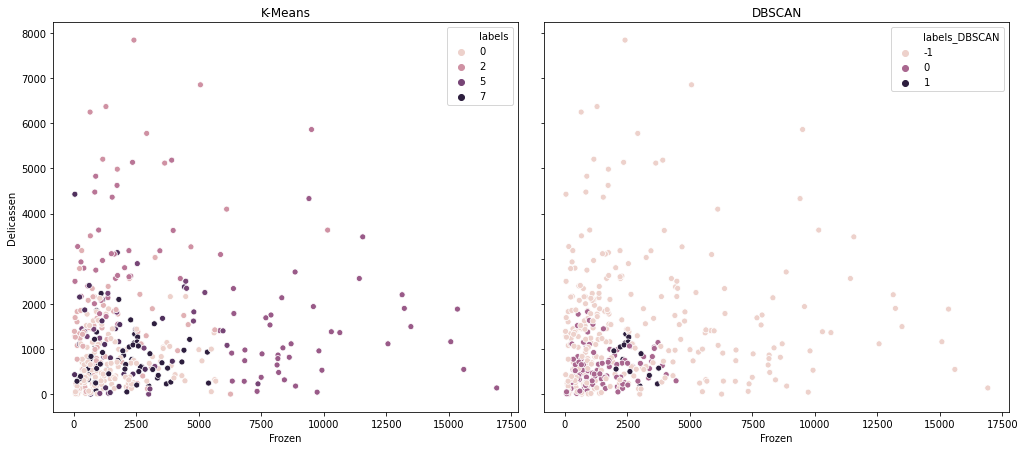

In [36]:
# Your code here:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(14, 6))
fig.tight_layout()

plt.sca(ax1)
ax1 = sns.scatterplot(x=df1.Frozen, y=df1.Delicassen, hue=df1.labels)
ax1.set_title('K-Means')
ax1.legend()

plt.sca(ax2)
ax2 = sns.scatterplot(x=df1.Frozen, y=df1.Delicassen, hue=df1.labels_DBSCAN)
ax2.set_title('DBSCAN')
ax2.legend();

Let's use a groupby to see how the mean differs between the groups. Group `customers` by `labels` and `labels_DBSCAN` respectively and compute the means for all columns.

In [37]:
# Your code here:
df1_kmeans =df1.groupby('labels')[vars[0:6]].mean()
df1_kmeans

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
labels,,,,,,
0,5019.795620,2509.839416,3116.700730,1597.948905,806.656934,663.379562
1,4974.507042,7623.633803,12076.985915,1312.239437,5212.633803,1171.154930
2,7743.666667,16914.000000,13408.833333,3372.583333,3741.250000,5243.166667
3,15844.571429,5262.771429,6703.857143,1907.657143,1950.200000,3096.600000
4,14297.738095,3471.738095,3683.928571,9479.309524,509.619048,1267.452381
5,37016.956522,3928.260870,5146.000000,2945.739130,770.434783,1288.347826
6,5614.666667,12830.366667,22502.800000,1495.300000,10421.500000,1222.033333
7,17592.921875,1931.406250,3013.312500,1962.328125,578.984375,744.484375


In [38]:
df1_dbscan =df1.groupby('labels_DBSCAN')[vars[0:6]].mean()
df1_dbscan

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
labels_DBSCAN,,,,,,
-1,11672.993197,6190.724490,8727.568027,2939.180272,3184.462585,1487.163265
0,6644.238095,1650.952381,2071.580952,1440.076190,379.961905,601.409524
1,20344.200000,1570.133333,2506.200000,2688.733333,430.466667,808.866667


Which algorithm appears to perform better?

In [39]:
# Your observations here
# It seams that DBSCAN perfoms better --> the difference between groups is clearer

# Bonus Challenge 2 - Changing K-Means Number of Clusters

As we mentioned earlier, we don't need to worry about the number of clusters with DBSCAN because it automatically decides that based on the parameters we send to it. But with K-Means, we have to supply the `n_clusters` param (if you don't supply `n_clusters`, the algorithm will use `8` by default). You need to know that the optimal number of clusters differs case by case based on the dataset. K-Means can perform badly if the wrong number of clusters is used.

In advanced machine learning, data scientists try different numbers of clusters and evaluate the results with statistical measures (read [here](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). We are not using statistical measures today but we'll use our eyes instead. In the cells below, experiment with different number of clusters and visualize with scatter plots. What number of clusters seems to work best for K-Means?

In [53]:
# Normalized dimension
X = customers_scale

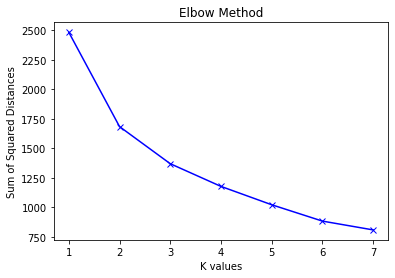

In [54]:
# Your code here
# Finding optimal number of Clusters for K-Means (Elbow Method)

# Arbitrarily selecting a range of values for K
K = range(1,8)
sum_of_squared_distances = []

# Using Scikit Learn’s KMeans Algorithm to find sum of squared distances
for k in K:
    model = KMeans(n_clusters=k).fit(X)
    sum_of_squared_distances.append(model.inertia_)
    
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('K values')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method')
plt.show()

In [42]:
# Your comment here
# Looking at the plot, we can see the elbow at K=3 and hence that is our optimal number of clusters for this dataset.

In [55]:
# Model
kmeans_reduced= KMeans(n_clusters=3)

# Fit
clusters_reduced= kmeans_reduced.fit(customers_scale)

df1['labels'] = kmeans_reduced.labels_
df1.head()

D:\ANACONDA\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels,labels_DBSCAN
0,2,3,12669,9656,7561,214,2674,1338,2,-1
1,2,3,7057,9810,9568,1762,3293,1776,1,-1
2,2,3,6353,8808,7684,2405,3516,7844,1,-1
3,1,3,13265,1196,4221,6404,507,1788,0,-1
4,2,3,22615,5410,7198,3915,1777,5185,0,-1


In [56]:
df1['labels'].value_counts()

2    231
1     95
0     88
Name: labels, dtype: int64

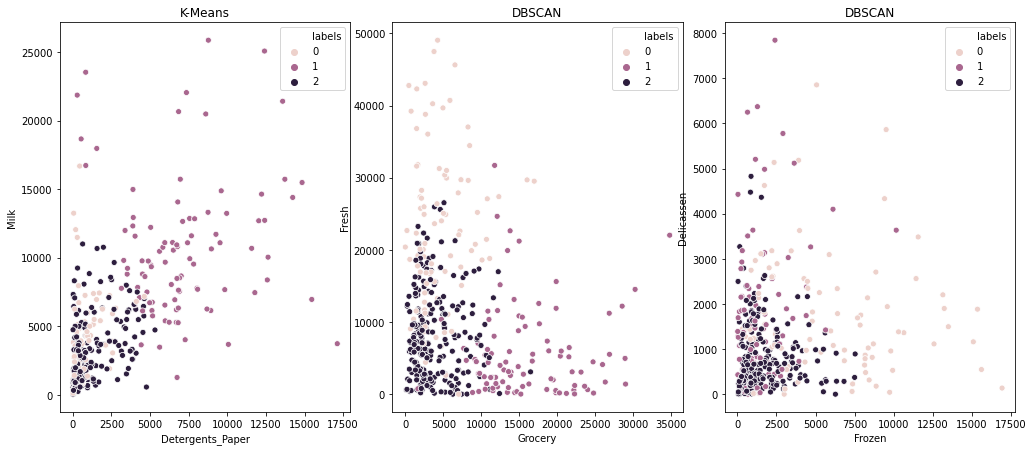

In [57]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(14, 6))
fig.tight_layout()

plt.sca(ax1)
ax1 = sns.scatterplot(x=df1.Detergents_Paper, y=df1.Milk, hue=df1.labels)
ax1.legend()

plt.sca(ax2)
ax2 = sns.scatterplot(x=df1.Grocery, y=df1.Fresh, hue=df1.labels)
ax2.legend()

plt.sca(ax3)
ax2 = sns.scatterplot(x=df1.Frozen, y=df1.Delicassen, hue=df1.labels)
ax2.legend();

# Bonus Challenge 3 - Changing DBSCAN `eps` and `min_samples`

Experiment changing the `eps` and `min_samples` params for DBSCAN. See how the results differ with scatter plot visualization.

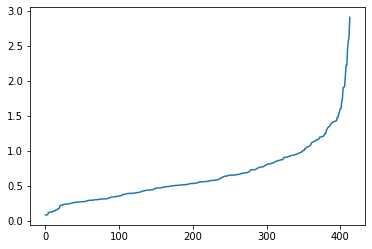

In [59]:
# Your code here

# Finding Optimal Value of EPS (Knee Method)
from sklearn.neighbors import NearestNeighbors

nearest_neighbors = NearestNeighbors(n_neighbors=3)
nearest_neighbors.fit(X)
distances, indices = nearest_neighbors.kneighbors(X)
distances = np.sort(distances, axis=0)[:, 1]
# print(distances)
plt.plot(distances)
plt.show()

In [52]:
# Your comment here
# The optimal value should be the value at which we see maximum curvature which in this case seems to be near 1.5.

In [60]:
# Model
dbscan= DBSCAN(eps=1.5)

# Fit
clusters= dbscan.fit(customers_scale)

df1['labels_DBSCAN'] = dbscan.labels_
df1

D:\ANACONDA\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels,labels_DBSCAN
0,2,3,12669,9656,7561,214,2674,1338,2,0
1,2,3,7057,9810,9568,1762,3293,1776,1,0
2,2,3,6353,8808,7684,2405,3516,7844,1,-1
3,1,3,13265,1196,4221,6404,507,1788,0,0
4,2,3,22615,5410,7198,3915,1777,5185,0,-1
...,...,...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204,0,-1
436,1,3,39228,1431,764,4510,93,2346,0,0
437,2,3,14531,15488,30243,437,14841,1867,1,-1
438,1,3,10290,1981,2232,1038,168,2125,2,0


In [62]:
df1['labels_DBSCAN'].value_counts()

 0    386
-1     28
Name: labels_DBSCAN, dtype: int64

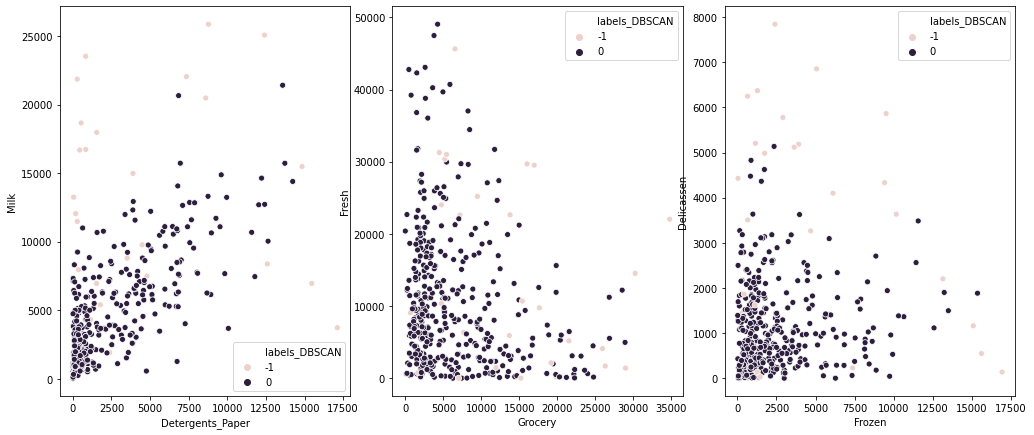

In [63]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(14, 6))
fig.tight_layout()

plt.sca(ax1)
ax1 = sns.scatterplot(x=df1.Detergents_Paper, y=df1.Milk, hue=df1.labels_DBSCAN)
ax1.legend()

plt.sca(ax2)
ax2 = sns.scatterplot(x=df1.Grocery, y=df1.Fresh, hue=df1.labels_DBSCAN)
ax2.legend()

plt.sca(ax3)
ax2 = sns.scatterplot(x=df1.Frozen, y=df1.Delicassen, hue=df1.labels_DBSCAN)
ax2.legend();